# Importing the Dependencies

For Data Manipulation

In [1]:
import pandas as pd
import numpy as np

For Data Visualisation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

For Machine Learning Models

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

To Ignore Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

For Visualisation Display

In [5]:
sns.set(style="whitegrid")
plt.style.use('ggplot')

The Source Data

In [6]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Understanding the data

Displaying First Few Rows

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Number of Rows and Columns
train_df.shape

(891, 12)

Understanding the Features and Target Variable

In [9]:
# Missing Values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Missing Values(2)
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Summary Statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

Working on Missing Values

In [12]:
# Filling Missing Values in Age Column
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [13]:
# Verifying the Age Column
missing_age = train_df['Age'].isnull().sum()
print(f"Number of missing values in Age column: {missing_age}")

Number of missing values in Age column: 0


In [14]:
# Filling Missing Values in Embarked Column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [15]:
# Rechecking Missing Values in Embarked Column
missing_embarked = train_df['Embarked'].isnull().sum()
print(f"Number of missing values in Embarked column: {missing_embarked}")

Number of missing values in Embarked column: 0


In [16]:
# Dropping the Cabin column as it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

In [17]:
# Dropping the Ticket Column as it is not required
train_df.drop(columns=['Ticket'], inplace=True)

In [18]:
# Dropping name column as it is not needed in my analysis
train_df.drop(columns=['Name'], inplace=True)

Feature Engineering

Family Size

In [19]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [20]:
print("Sample of Family Size column:")
print(train_df[['FamilySize']].head())

Sample of Family Size column:
   FamilySize
0           2
1           2
2           1
3           2
4           1


People Travelling Alone

In [21]:
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0

In [22]:
print("\nNumber of people traveling alone:")
print(train_df['IsAlone'].sum())


Number of people traveling alone:
537


Age Groups

In [23]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

In [24]:
print("Distribution of Age Groups:")
print(train_df['AgeGroup'].value_counts())

Distribution of Age Groups:
AgeGroup
Adult          535
Middle-aged    195
Teen            70
Child           69
Senior          22
Name: count, dtype: int64


Fare Per Person

In [25]:
train_df['FarePerPerson'] = train_df['Fare'] / train_df['FamilySize']
train_df['FarePerPerson'] = train_df['FarePerPerson'].fillna(train_df['FarePerPerson'].median())

In [26]:
print("Sample of Fare per Person column:")
print(train_df[['FarePerPerson']].head())

Sample of Fare per Person column:
   FarePerPerson
0        3.62500
1       35.64165
2        7.92500
3       26.55000
4        8.05000


In [27]:
# Rechecking the columns
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,FarePerPerson
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,Adult,3.62500
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,Middle-aged,35.64165
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,Adult,7.92500
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,Adult,26.55000
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,Adult,8.05000


Encoding Categorical Variables

In [28]:
# Encoding the Gender
train_df['Sex'] = train_df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [29]:
# Encoding the Embarked Column
train_df.replace( {'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# Visualisations

Plot of Age distribution of Passengers

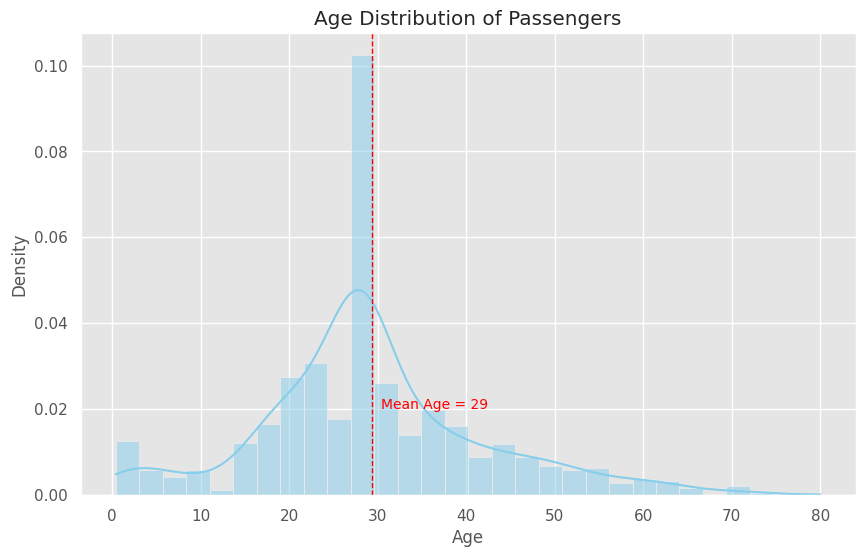

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.axvline(train_df['Age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(train_df['Age'].mean() + 1, 0.02, 'Mean Age = 29', color='red')
plt.show()

Plot for Number of Survivors

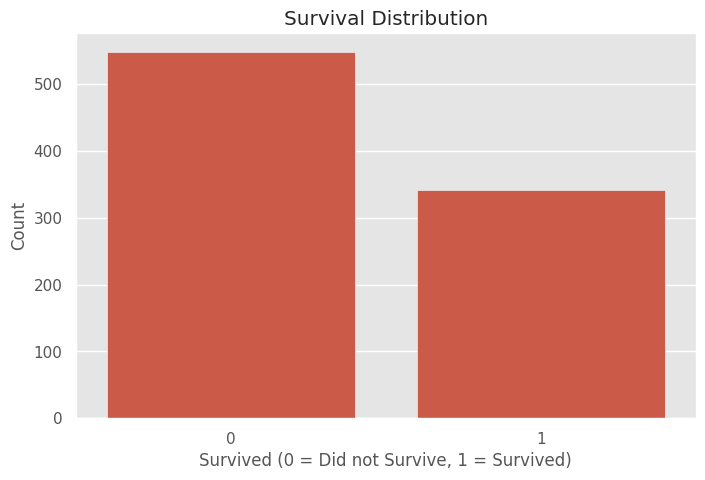

In [31]:
# Plot for Number of Survivors
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = Did not Survive, 1 = Survived)')
plt.ylabel('Count')
plt.show()

In [32]:
# Number of Survivors
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Plot for Survival Count by Age Group

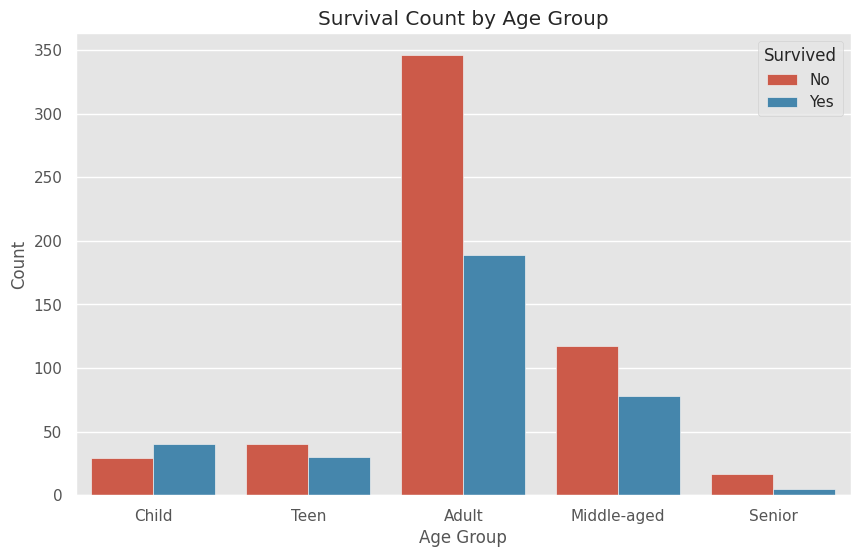

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [34]:
# Total  People aboard classified according to their Age Groups
train_df['AgeGroup'].value_counts()

,count
AgeGroup,
Adult,535
Middle-aged,195
Teen,70
Child,69
Senior,22


Plot for Survival Rate by Gender

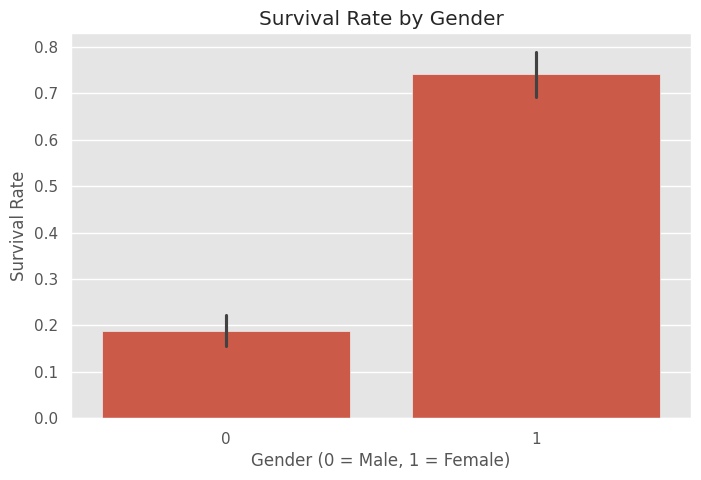

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

In [36]:
# Number of people according to their Gender
print('0 = Male', ' 1 = Female')
train_df['Sex'].value_counts()

0 = Male  1 = Female


,count
Sex,
0,577
1,314


Plot for Survival by Age distribution

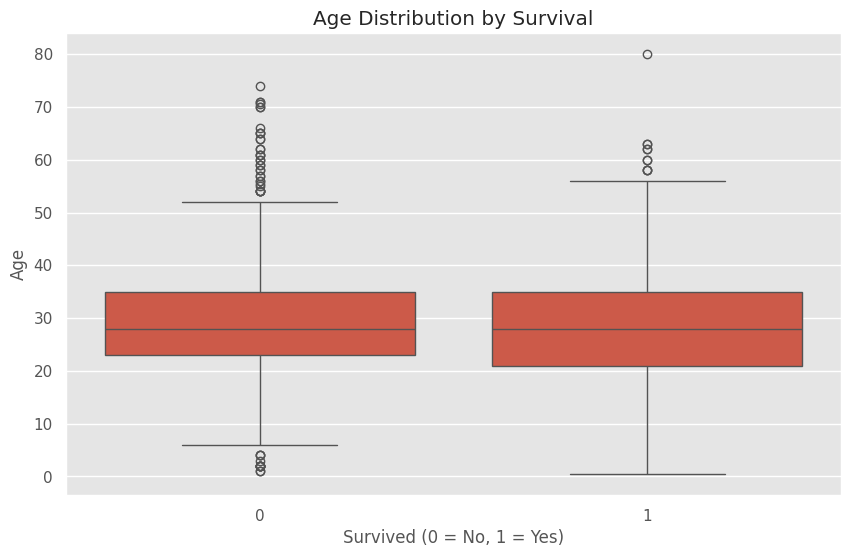

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

Plot for Survival Rate by Family Size

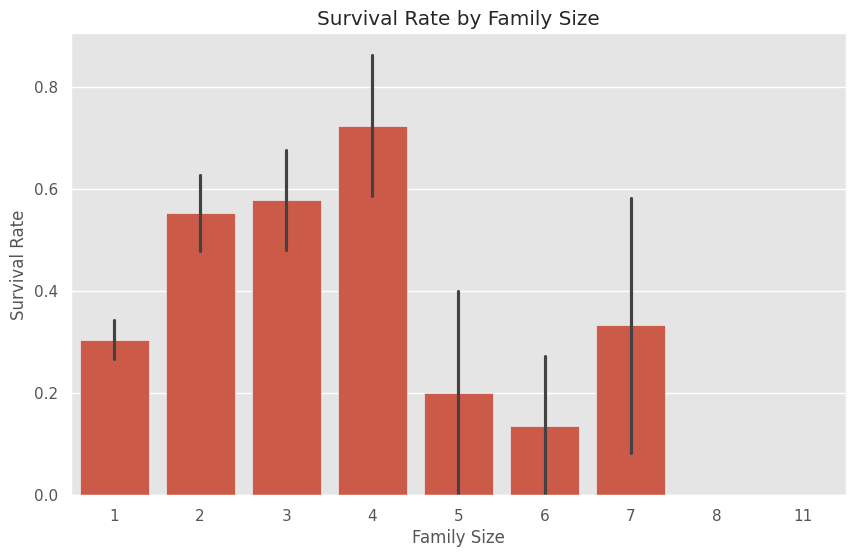

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [39]:
train_df['FamilySize'].value_counts()

,count
FamilySize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


 Survival Rate by Passenger Class

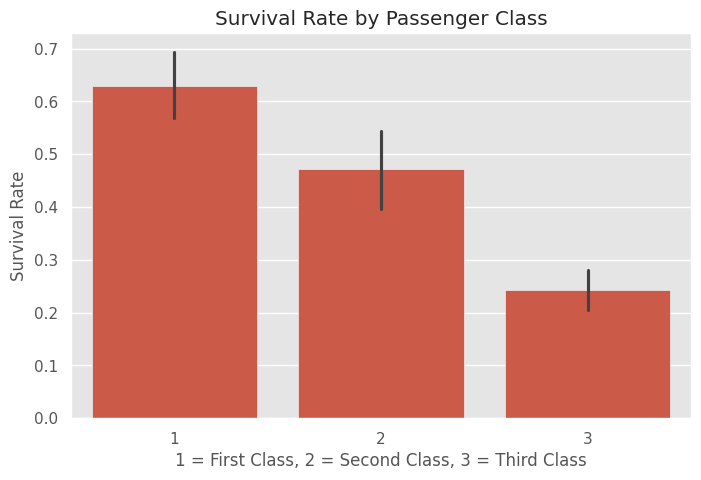

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('1 = First Class, 2 = Second Class, 3 = Third Class')
plt.ylabel('Survival Rate')
plt.show()
#Here 1 = First Class, s = 2 = Second Class, 3 = Third Class

Plot for Fare Distribution

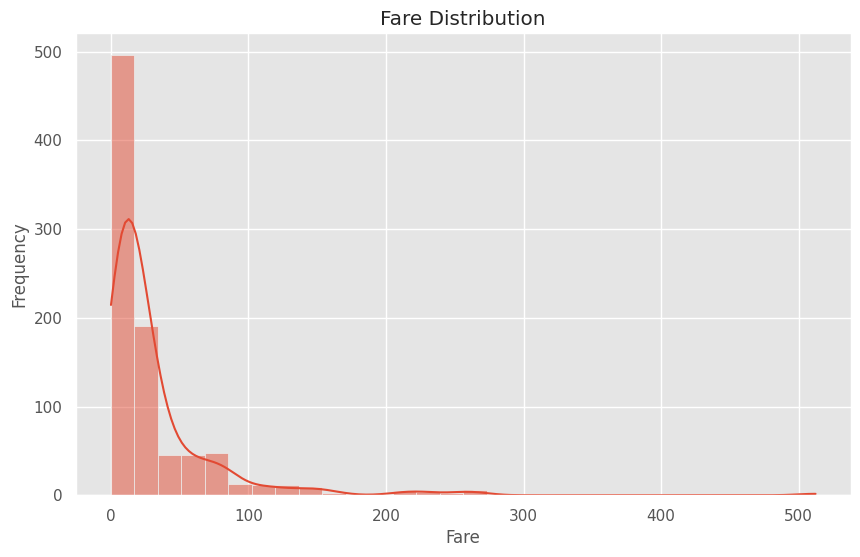

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Pair Plot of All Numerical Values

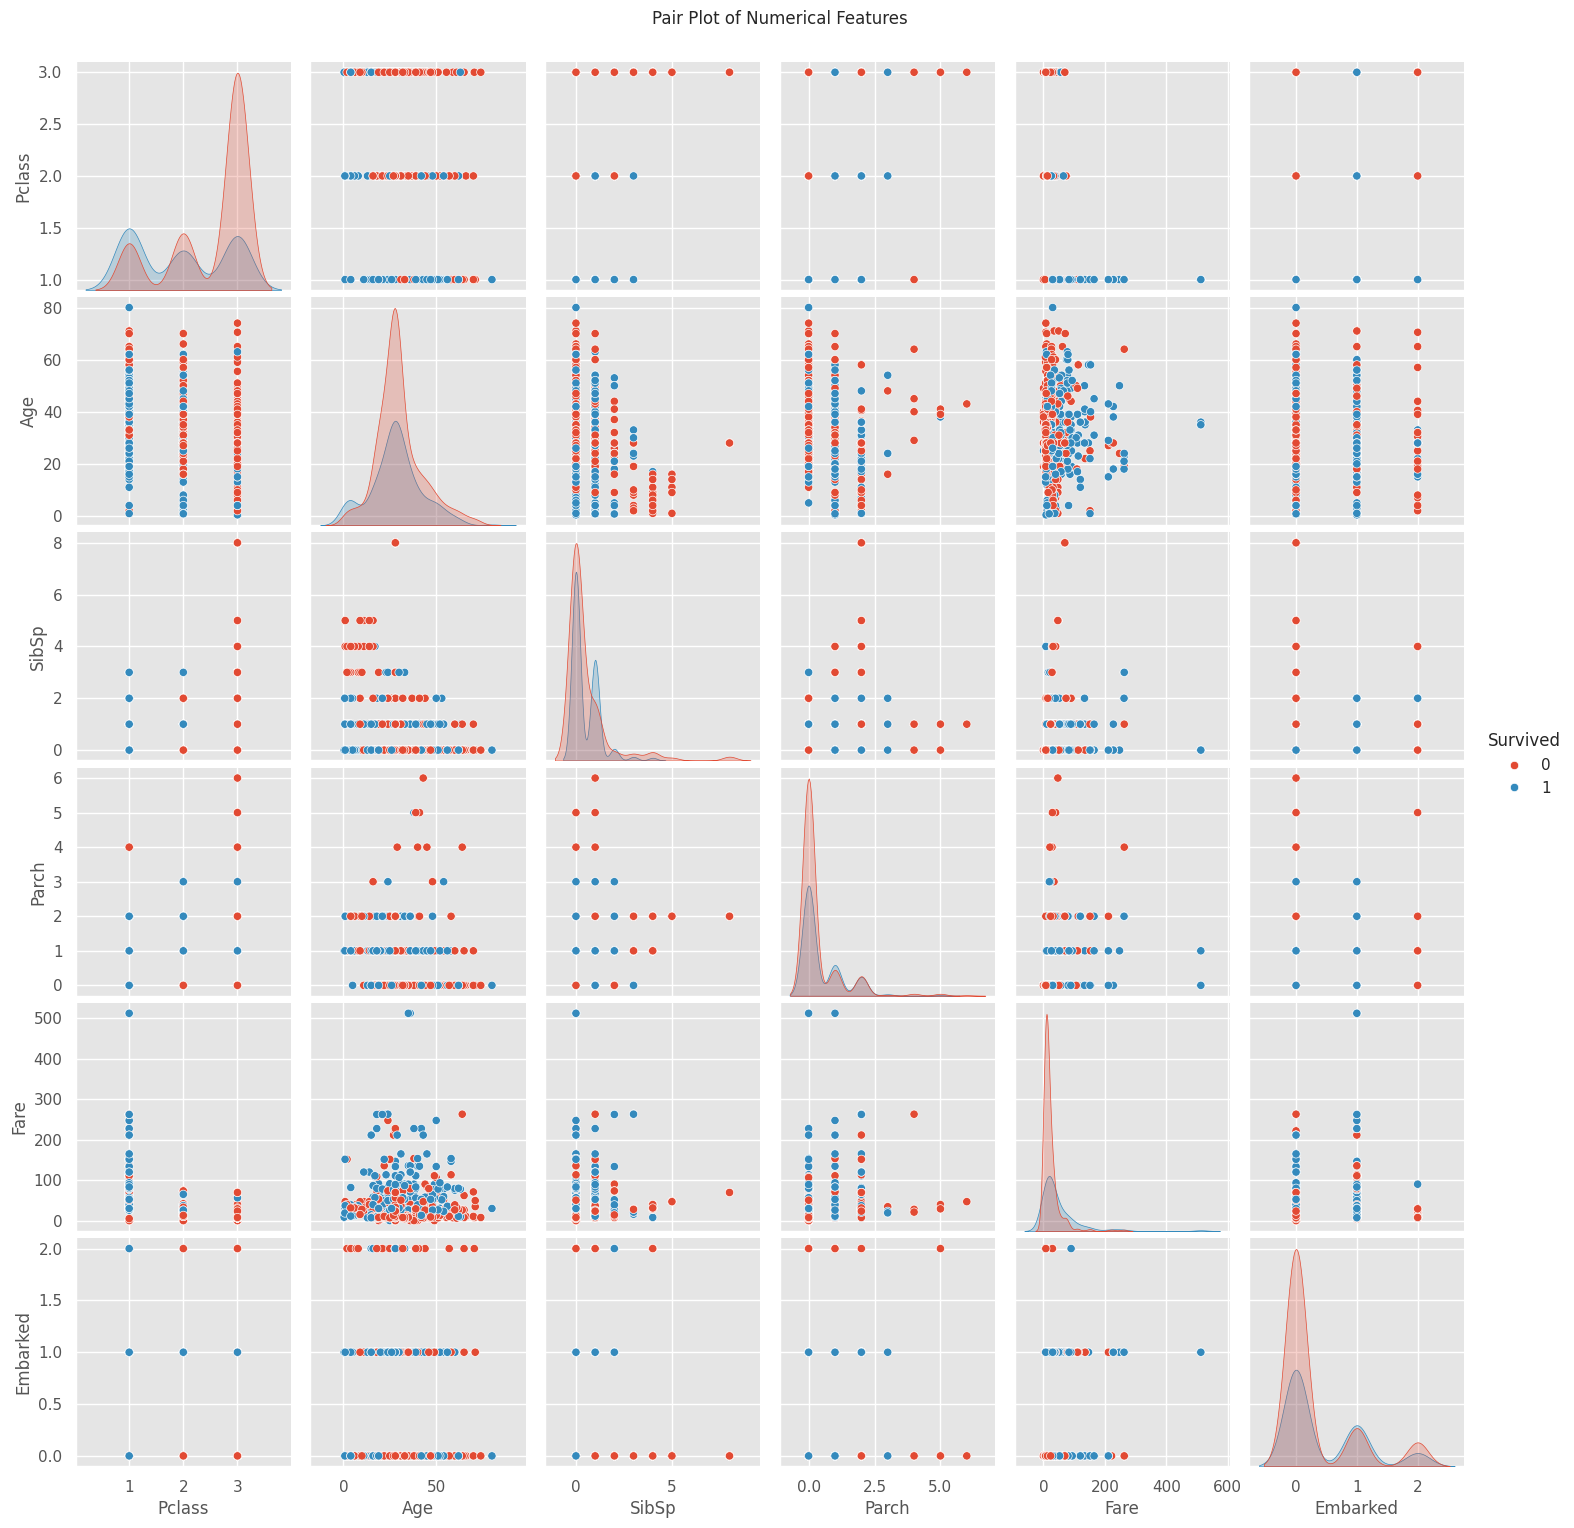

In [42]:
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
sns.pairplot(train_df[numerical_cols], hue='Survived')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Model Building

Retaining the necessary Columns

In [43]:
# Checking the data again
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,FarePerPerson
0,1,0,3,0,22.0,1,0,7.2500,0,2,0,Adult,3.62500
1,2,1,1,1,38.0,1,0,71.2833,1,2,0,Middle-aged,35.64165
2,3,1,3,1,26.0,0,0,7.9250,0,1,1,Adult,7.92500
3,4,1,1,1,35.0,1,0,53.1000,0,2,0,Adult,26.55000
4,5,0,3,0,35.0,0,0,8.0500,0,1,1,Adult,8.05000


In [44]:
# Keeping 'Survived' as target, 'Age' is binned
X = train_df.drop(columns=['PassengerId', 'Survived', 'FamilySize', 'IsAlone', 'AgeGroup', 'FarePerPerson'])

In [45]:
# Verifying
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [46]:
y = train_df['Survived']

X = Feature, Y = Target

Splitting the data into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Verifying Remaining Columns
print(X_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [49]:
# Printing the y_train
print(y_train.head())

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


#Training the Models

Logistic Regression Model

In [50]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# Predictions and evaluation
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Decision Tree

In [52]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# Predictions and evaluation
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Random Forest

In [54]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Predictions and evaluation
y_pred_forest = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



K-Nearest Neighbors (KNN)

In [56]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.6983240223463687
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       105
           1       0.68      0.51      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



Support Vector Machine (SVM)

In [58]:
# Support Vector Classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [59]:
# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.6536312849162011
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



#Model Evaluation

In [60]:
# Accuracy scores for all models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.7988826815642458
Decision Tree Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8268156424581006
K-Nearest Neighbors Accuracy: 0.6983240223463687
Support Vector Machine Accuracy: 0.6536312849162011


Selecting the Best Performing Model

In [61]:
# Predictions using the Random Forest model
y_pred_forest = random_forest.predict(X_test)

In [62]:
# Confusion Matrix for Random Forest Model
print("Confusion Matrix for Random Forest Classifier:\n", confusion_matrix(y_test, y_pred_forest))

Confusion Matrix for Random Forest Classifier:
 [[92 13]
 [18 56]]


In [63]:
# Classification report for Random Forest Model
print(f"Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_forest))

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Model Comparison Table

| Model                   | Accuracy | Precision (Not Survived) | Precision (Survived) | Recall (Not Survived) | Recall (Survived) | F1-Score (Not Survived) | F1-Score (Survived) |
|-------------------------|----------|--------------------------|--------------------------|-----------------------|-----------------------|--------------------------|--------------------------|
| Random Forest            | 0.83     | 0.84                     | 0.81                     | 0.88                  | 0.76                  | 0.86                     | 0.78                     |
| Logistic Regression      | 0.80     | 0.82                     | 0.77                     | 0.85                  | 0.73                  | 0.83                     | 0.75                     |
| Decision Tree            | 0.80     | 0.83                     | 0.76                     | 0.83                  | 0.76                  | 0.83                     | 0.76                     |
| K-Nearest Neighbors      | 0.70     | 0.71                     | 0.68                     | 0.83                  | 0.51                  | 0.76                     | 0.58                     |
| Support Vector Machine   | 0.65     | 0.64                     | 0.75                     | 0.94                  | 0.24                  | 0.76                     | 0.37                     |


Accuracy: Indicates the overall effectiveness of the model by calculating the percentage of accurate predictions.

Precision: The ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant.

Recall: The ratio of true positive predictions to the actual positives, measuring the model's ability to identify all relevant instances.

F1 Score: Combines Precision and Recall into a single metric, making it ideal for uneven class distributions.


Visual Display for Accuracy Comparison

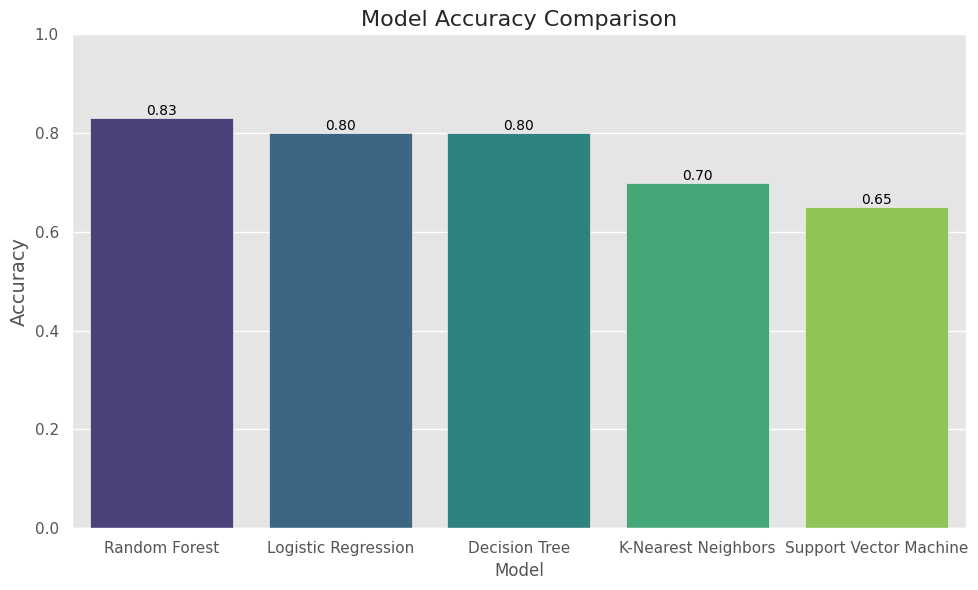

In [64]:
# Data for the models
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Accuracy': [0.83, 0.80, 0.80, 0.70, 0.65]
}

# Converting the data to a DataFrame
accuracy_df = pd.DataFrame(data)

# Setting the figure size
plt.figure(figsize=(10, 6))

# For bar plot for accuracy
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)

# Adding data labels to the bars
for bar in bar_plot.patches:
    bar_plot.annotate(f'{bar.get_height():.2f}',
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center',
                      va='center',
                      fontsize=10,
                      color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Adjusting legend position (not needed for a single metric)
plt.tight_layout()

# Show the plot
plt.show()

Visual display for Precision Comparison

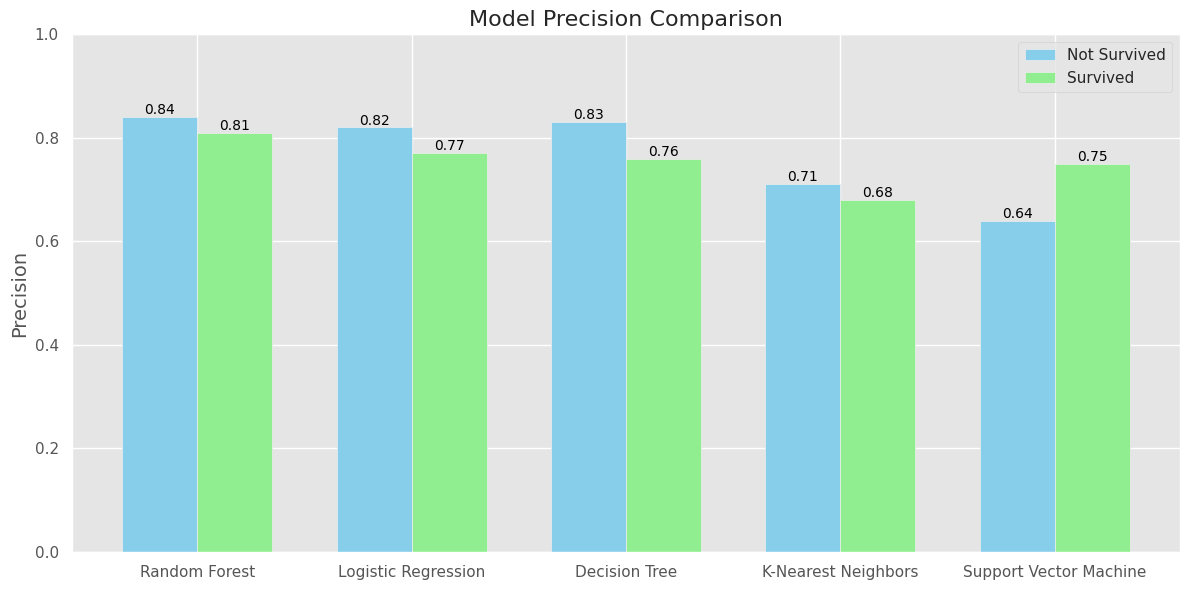

In [65]:
# Data for the models
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Precision (Not Survived)': [0.84, 0.82, 0.83, 0.71, 0.64],
    'Precision (Survived)': [0.81, 0.77, 0.76, 0.68, 0.75]
}

# Converting the data to a DataFrame
precision_df = pd.DataFrame(data)

# Setting the figure size
plt.figure(figsize=(12, 6))

# For bar plot for precision
bar_width = 0.35
x = range(len(precision_df['Model']))

# Creating bars for 'Not Survived' and 'Survived' precision
bars1 = plt.bar(x, precision_df['Precision (Not Survived)'], width=bar_width, label='Not Survived', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], precision_df['Precision (Survived)'], width=bar_width, label='Survived', color='lightgreen')

# Adding title and labels
plt.title('Model Precision Comparison', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], precision_df['Model'])
plt.ylabel('Precision', fontsize=14)
plt.ylim(0, 1)

# Adding data labels to the bars
for bar in bars1:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

for bar in bars2:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

# Adding legend
plt.legend()

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

Visual display for Recall Comparison

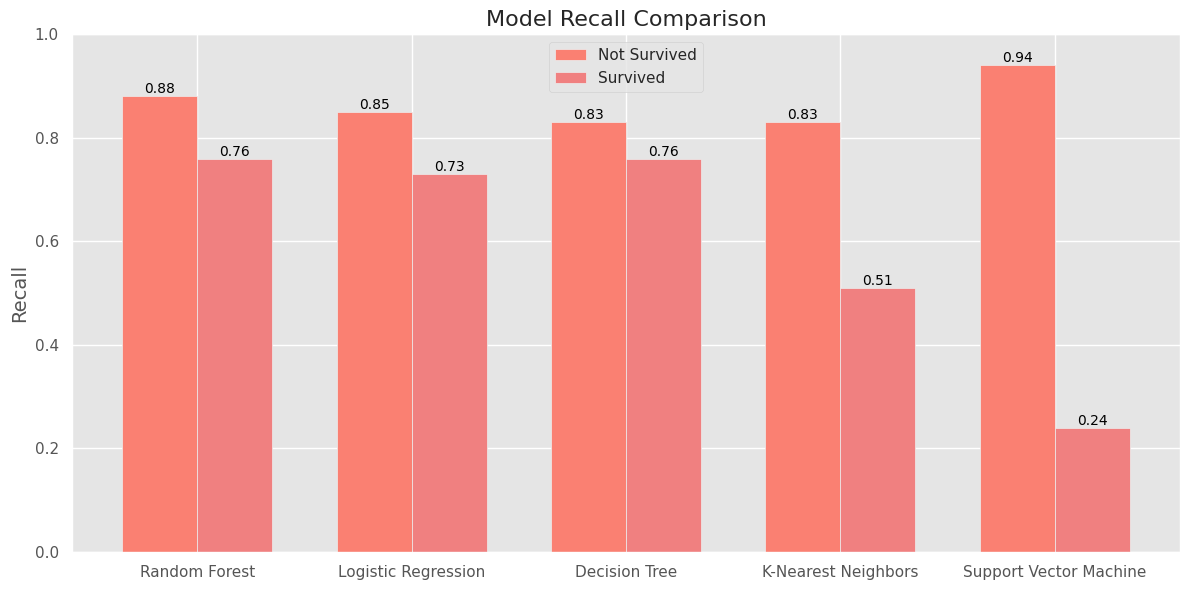

In [66]:
# Data for the models
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Recall (Not Survived)': [0.88, 0.85, 0.83, 0.83, 0.94],
    'Recall (Survived)': [0.76, 0.73, 0.76, 0.51, 0.24]
}

# Converting the data to a DataFrame
recall_df = pd.DataFrame(data)

# Setting the figure size
plt.figure(figsize=(12, 6))

# For bar plot for recall
bar_width = 0.35
x = range(len(recall_df['Model']))

# Creating bars for 'Not Survived' and 'Survived' recall
bars1 = plt.bar(x, recall_df['Recall (Not Survived)'], width=bar_width, label='Not Survived', color='salmon')
bars2 = plt.bar([p + bar_width for p in x], recall_df['Recall (Survived)'], width=bar_width, label='Survived', color='lightcoral')

# Adding title and labels
plt.title('Model Recall Comparison', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], recall_df['Model'])
plt.ylabel('Recall', fontsize=14)
plt.ylim(0, 1)

# Adding data labels to the bars
for bar in bars1:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

for bar in bars2:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

# Adding legend
plt.legend(loc='upper center')
# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

Visual Display for F1 Score Comparison

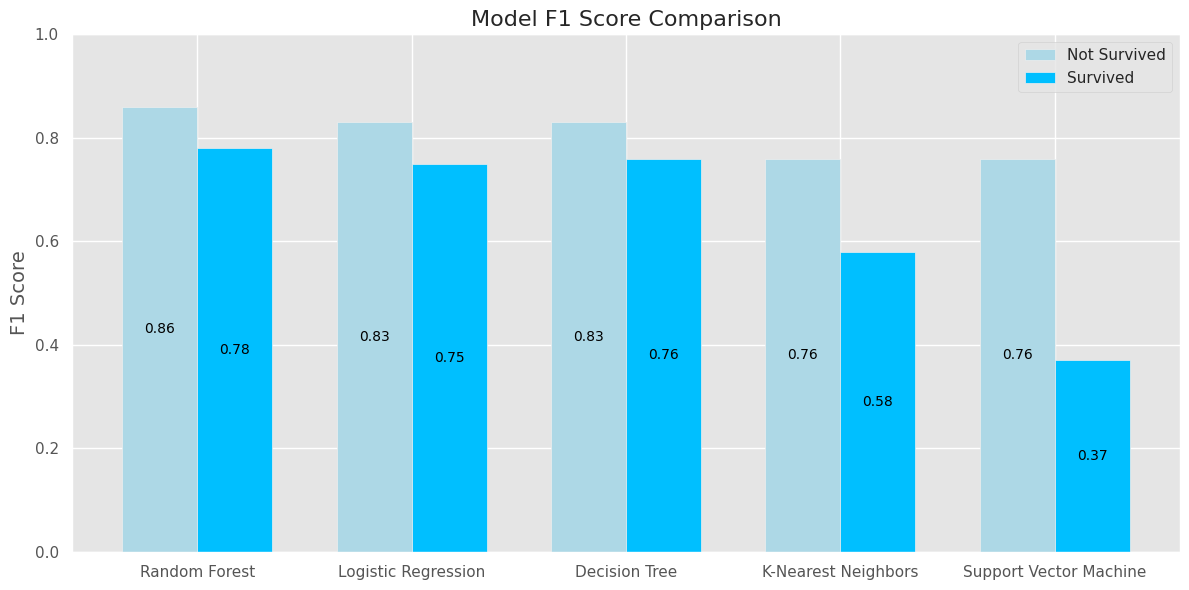

In [67]:
# Data for the models
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'F1-Score (Not Survived)': [0.86, 0.83, 0.83, 0.76, 0.76],
    'F1-Score (Survived)': [0.78, 0.75, 0.76, 0.58, 0.37]
}

# Converting the data to a DataFrame
f1_score_df = pd.DataFrame(data)

# Setting the figure size
plt.figure(figsize=(12, 6))

# For bar plot for F1 scores
bar_width = 0.35
x = range(len(f1_score_df['Model']))

# Creating bars for 'Not Survived' and 'Survived' F1 scores
bars1 = plt.bar(x, f1_score_df['F1-Score (Not Survived)'], width=bar_width, label='Not Survived', color='lightblue')
bars2 = plt.bar([p + bar_width for p in x], f1_score_df['F1-Score (Survived)'], width=bar_width, label='Survived', color='deepskyblue')

# Adding title and labels
plt.title('Model F1 Score Comparison', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], f1_score_df['Model'])
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0, 1)

# Adding data labels to the bars (centered)
for bar in bars1:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),  # Centered inside the bar
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black')

for bar in bars2:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),  # Centered inside the bar
                 ha='center',
                 va='center',
                 fontsize=10,
                 color='black')

# Adding legend with custom location
plt.legend(loc='upper right')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

## Report:

Among all the models evaluated, the **Random Forest Classifier** yielded the highest accuracy of 83%. It outperforms other models with a balanced performance across precision, recall, and F1-score for both those who did not survive and those who survived . Its ability to generalize well across different classes makes it the most suitable model for this task.

To further enhance performance, especially for survivors, the following steps can be taken:
- Perform **cross-validation** to ensure the model generalizes well to unseen data.
- Apply **feature selection** to identify and retain the most important features for the model, reducing noise and improving performance.
- Test different algorithms or ensemble techniques, such as **XGBoost** or **Gradient Boosting Machines**, to see if further improvements can be made.